# Принятие решений в бизнесе

**Позиция:** аналитик крупного интернет магазина.

**Дано:** список гипотез для увеличения выручки.

**Необходимо:** приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

**Первая часть задания - Приоритизация гипотез**

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

**Вторая часть задания - Анализ A/B-теста**

- Проанализируйте A/B-тест:
- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. - Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. - Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

**По результатам теста необходимо принять решение. Варианты решений:**

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

In [1]:
# Загружаем библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters

In [2]:
# Указываем базовые настройки 
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)
register_matplotlib_converters()
sns.set_style('whitegrid')

In [3]:
# Указываем путь к файлу
try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )
except: 
    hypothesis, orders, visitors = (
        pd.read_csv('C:/Users/Boris/datasets/hypothesis.csv'),
        pd.read_csv('C:/Users/Boris/datasets/orders.csv'),
        pd.read_csv('C:/Users/Boris/datasets/visitors.csv')
    )

## Предварительная обработка данных

In [4]:
# Задаем функцию предварительного просмотра данных
def first_look(df):
    print('-'*20, 'Первые 10 строк', '-'*20 ,end='\n')
    display(df.head(10))
    print('-'*20, 'Информация', '-'*20 ,end='\n')
    display(df.info())
    print('-'*20, 'Описание данных', '-'*20 ,end='\n')
    display(df.describe())
    print('-'*20, 'Cумма пропусков', '-'*20 ,end='\n')
    display(df.isna().sum())
    print('-'*20, 'Сумма дубликатов', '-'*20 ,end='\n')
    display(df.duplicated().sum())

### Набор данных hypothesis

In [5]:
# Применяем функцию fisrt_look
first_look(hypothesis)

-------------------- Первые 10 строк --------------------


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


-------------------- Информация --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

-------------------- Описание данных --------------------


,Reach,Impact,Confidence,Efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


-------------------- Cумма пропусков --------------------


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

-------------------- Сумма дубликатов --------------------


0

Сразу приведем названия стобцов к нижнему регистру:

In [6]:
hypothesis.columns = hypothesis.columns.str.lower()

Из набора данных **hypothesis** видим: 

- *Hypothesis* — краткое описание гипотезы;
- *Reach* — охват пользователей по 10-балльной шкале;
- *Impact* — влияние на пользователей по 10-балльной шкале;
- *Confidence* — уверенность в гипотезе по 10-балльной шкале;
- *Efforts* — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Дано 9 теорий, для каждой из которой расчитан охват, влияние, уверенность в гипотезе и затраты на проверку.

В наборе данных нет дубликатов или пропусков

### Набор данных orders

In [7]:
first_look(orders)

-------------------- Первые 10 строк --------------------


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


-------------------- Информация --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

-------------------- Описание данных --------------------


,transactionId,visitorId,revenue
count,1197.00,1197.00,1197.00
mean,2155621385.53,2165960143.10,8348.01
std,1229084904.76,1236014192.15,39191.13
min,1062393.00,5114589.00,50.00
25%,1166775572.00,1111826046.00,1220.00
50%,2145193898.00,2217984702.00,2978.00
75%,3237740112.00,3177606451.00,8290.00
max,4293855558.00,4283872382.00,1294500.00


-------------------- Cумма пропусков --------------------


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

-------------------- Сумма дубликатов --------------------


0

Сразу приведем названия столбцов к нижнему регистру:

In [8]:
orders.columns = orders.columns.str.lower()

Из набора данных **orders** получили: 

- *transactionId* — идентификатор заказа;
- *visitorId* — идентификатор пользователя, совершившего заказ;
- *date* — дата, когда был совершён заказ;
- *revenue* — выручка заказа;
- *group* — группа A/B-теста, в которую попал заказ.

Всего в данном наборе данных есть 1197 строк, в которых указаны индификаторы заказа и пользователя, дата и выручка, а также, группа, в которую попал заказ. 

Пропусков или дубликатов нет.

### Набор данных visitors

In [9]:
first_look(visitors)

-------------------- Первые 10 строк --------------------


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


-------------------- Информация --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

-------------------- Описание данных --------------------


,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


-------------------- Cумма пропусков --------------------


date        0
group       0
visitors    0
dtype: int64

-------------------- Сумма дубликатов --------------------


0

В наборе данных **visitors**:

- *date* — дата;
- *group* — группа A/B-теста;
- *visitors* — количество пользователей в указанную дату в указанной группе A/B-теста

В данном наборе данных указано колличество пользователей, которые были в указанную дату и в указанной группе. 

Пропусков или дубликатов нет.

### Изменение типов данных

In [10]:
display(hypothesis.info())
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Мы видим, что в наборе данных orders и visitors тип date стоит как object, заменим его на date:

In [11]:
# изменяем тип данных на дату
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

# изменяем тип данных в visitors на дату
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Изменили тип данных в необходимых данных

### Проверка пересечений составов групп теста

Найдем значение колличества пользователей в обеих группах:

In [12]:
# находим пересечение множеств пользователей групп
intersection = list(
    set(orders.query('group == \"A\"')['visitorid'].unique()) & 
    set(orders.query('group == \"B\"')['visitorid'].unique())
)
print('Колличество пользователей в обеих группах', len(intersection))

Колличество пользователей в обеих группах 58


Получили 58 пользователей, которые числятся как в группе A, так и в группе B. Проверим процент колличества данных повторений от общего числа пользователей в группах:

In [13]:
# Выведем процент повторов для группы A
print('Процент повторений от общего числа в группе A:',\
      round(len(intersection) / orders.query('group == \"A\"')['visitorid'].nunique() * 100, 2), '%')
# Выведем процент повторов для группы B
print('Процент повторений от общего числа в группе B:',\
      round(len(intersection) / orders.query('group == \"B\"')['visitorid'].nunique() * 100, 2), '%')

Процент повторений от общего числа в группе A: 11.53 %
Процент повторений от общего числа в группе B: 9.9 %


Получили процент повторений от общего числа в группах, теперь исключим повторяющихся в обеих группах пользователей из данных:

In [14]:
orders = orders.query('visitorid not in @intersection')

Таким образом, получили корректные данные.

### Вывод по разделу

В имеющихся у нас данных нет пропусков или дубликатов, а значит о целостности можно не беспокоиться. 
Данные хорошо описаны. Все названия приведены в рабочий вид. Типы данных изменены на нужные. 

Проведён подсчёт колличествоа пользователей в обеих группах, подсчитан процент повторов. 

Можно приступать к следующему этапу работы. 

## Приоритизация гипотез

Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса мы приоритизируем гипотезы. 

Фреймворки ICE и RICE состоят из четырёх компонентов:

- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу. 

### Метод ICE

Делаем расчет приоритизации гипотез метдом ICE:
<font face="Microsoft Yahei">$$ICE\;score  = \dfrac{impact\:\times\: confidence}{efforts}$$</font>

In [15]:
# Делаем расчет ICE
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


После расчётов видим, что с отрывом есть 3 гипотезы, который можно отметить как ниболее приоритетные по методу ICE. 

### Метод RICE

Делаем расчет приоритизации гипотез метдом RICE:
<font face="Microsoft Yahei">$$RICE\;score  = \dfrac{reach\:\times\: impact\: \times\: confidence}{efforts}$$</font>

In [16]:
# Делаем расчет RICE
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


После расчётов по методу RICE лидеры несколько поменялись, с большим отрывом выделяется одна гипотеза. В данном методе большое значение имеет охват аудитории. 

Сравним результаты методов:

In [17]:
hypothesis['ratio'] = hypothesis['ice'] / hypothesis['rice']
hypothesis[['ice', 'rice', 'ratio']].sort_values(by='ratio')

,ice,rice,ratio
7,11.20,112.00,0.10
2,7.00,56.00,0.12
3,1.12,9.00,0.12
6,8.00,40.00,0.20
4,1.00,3.00,0.33
5,1.33,4.00,0.33
0,13.33,40.00,0.33
1,2.00,4.00,0.50
8,16.20,16.20,1.00


### Вывод по разделу

Мы осуществили приоритизацию гипотез. Стоит отметить что результаты несколько разнятся для методов ICE и RICE. В методе RICE мы наглядно увидели, что данный метод отмечает воздейсвие проверки гипотез на охват пользователей. 

По полученным данным, можно отметить гипотезы, которые стоит проверять в первую очередь с учетом охвата пользователей: 
- Гипотеза №7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Гипотеза №2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Гипотеза №0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Гипотеза №6. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	

Если делать уклон не на охват пользователей, то можно отметить следующие гипотезы: 
- Гипотеза №8. Запустить акцию, дающую скидку на товар в день рождения
- Гипотеза №0. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
- Гипотеза №7. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

Как мы видим, есть схожести в обоих списках. 

По моему мнению начинать в первую очередь стоить начать проверку теории №7 с большим охватом. Она принесёт наибольшие диведенты компании. 

## Анализ A/B теста 

Для дальнейшего анализа A/B теста создадим массив уникальных пар дат и групп теста. Далее получим агрегированные кумулятивные данные по дням для посетителей. 

In [18]:
#создаем массив уникальных пар значений дат и групп теста
dt_groups = orders[['date', 'group']].drop_duplicates()  

#получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dt_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg({
            'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitorid': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dt_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({
        'date': 'max',
        'group': 'max', 
        'visitors': 'sum'
    }
    ),
    axis=1,
).sort_values(by=['date', 'group']) 

#объединям полученные таблицы по дате и группе 
cumulative_df = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
#переименум столбцы 
cumulative_df.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
] 
#выведем полученную таблицу
cumulative_df.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Получили оптимизированные данные.

### График кумулятивной выручки по группам

Пострим график кумулятивной выручки по группам:

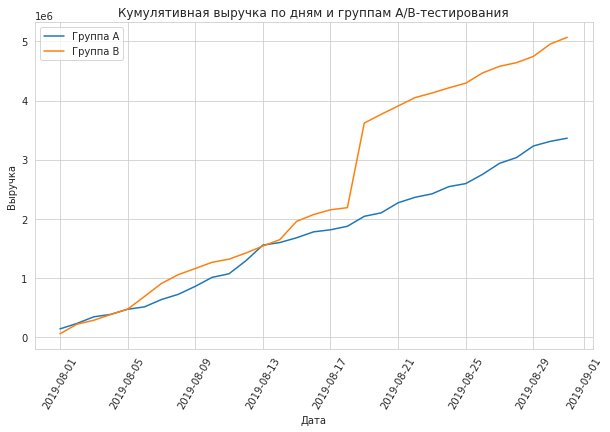

In [19]:
#зададим параметры графика 
plt.figure(figsize=(10,6))  

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_df[cumulative_df['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_df[cumulative_df['group']=='B'][['date','revenue', 'orders']]

# строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

# зададим описание графика
plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Выручка') 
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.xticks(rotation = 60)
plt.show() 

По полученным данным видно, что на протяжении всего срока проведений эксперимента группа B лидирует. Также, виден сильный скачок в период с 17 по 18 авнусиа 2019 года. Вполне возможно, что это связано с анамальными значениями стоимости или колличества заказов. 

### График кумулятивного среднего чека по группам

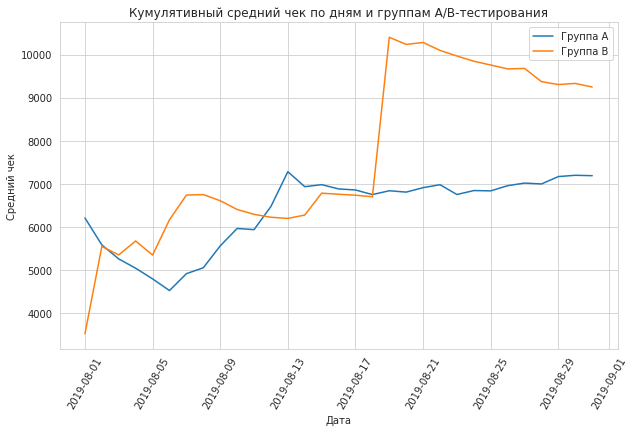

In [20]:
#зададим параметры графика 
plt.figure(figsize=(10,6))  

#построим графики, что бы получить средний чек, разделим выручку на число заказов
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend()  

# зададим описание графика
plt.legend(['Группа А', 'Группа B']) 
plt.xlabel('Дата')
plt.ylabel('Средний чек') 
plt.title('Кумулятивный средний чек по дням и группам A/B-тестирования')
plt.xticks(rotation = 60)
plt.show()  

По полученным данным видно:

- в первой половине теста графики ведут себя не стабильно, есть как сильные росты, так и падения
- на графике среднего чека анамальное значения для группе B в период с 08.17 по 08.21 уже более явное
- к коцу периода коммулятивный средний чек группы B, выше, чем у А, но стоит учесть, что были анамальные значения
- к концу периода у группы А есть тенденция к росту, а у B к снижению

### График относительного изменения кумулятивного среднего чека группы B к группе A

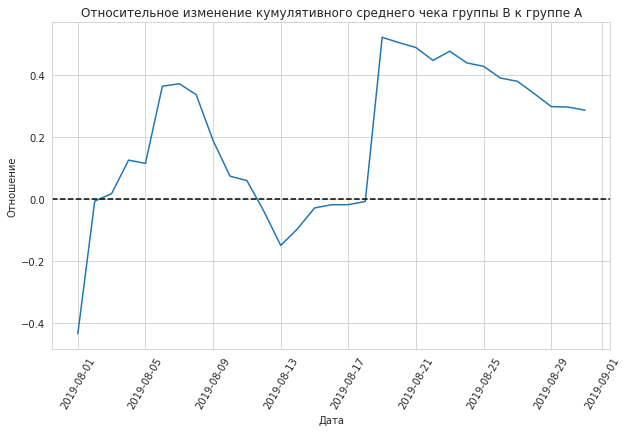

In [21]:
#объеденим по столбцу с датой и зададим суффиксы для каждый группы 
merged_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    left_on='date', right_on='date', 
    how='left',
    suffixes=['_a', '_b']
)

# зададим размеры графика  
plt.figure(figsize=(10,6))   
# cтроим отношение средних чеков
plt.plot(
    merged_revenue['date'],
    (merged_revenue['revenue_b']/
     merged_revenue['orders_b'])/
    (merged_revenue['revenue_a']/
     merged_revenue['orders_a'])
    -1
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')  
# зададим описание графика 
plt.xlabel('Дата')
plt.ylabel('Отношение') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation = 60)
plt.show()   

По полученным данным видим резкие скачки. Это может означать, что в эти дни были произведены аномальные значения в данных.

### График кумулятивного среднего количества заказов на посетителя по группам

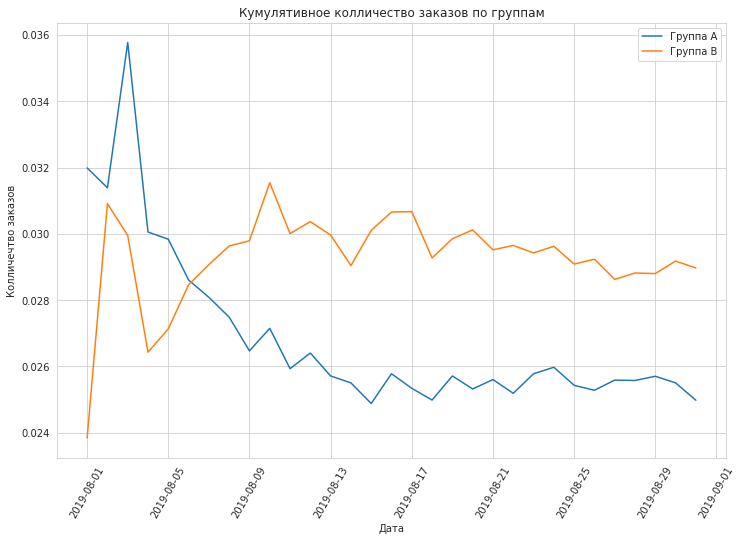

In [22]:
# считаем кумулятивную конверсию
cumulative_df['conversion'] = cumulative_df['orders']/cumulative_df['visitors']

# отделяем данные по группе A
cumulative_df_a = cumulative_df[cumulative_df['group']=='A']

# отделяем данные по группе B
cumulative_df_b = cumulative_df[cumulative_df['group']=='B']

# зададим размеры графика  
plt.figure(figsize=(12,8))   

# строим графики
plt.plot(cumulative_df_a['date'], cumulative_df_a['conversion'], label='A')
plt.plot(cumulative_df_b['date'], cumulative_df_b['conversion'], label='B')


# зададим описание графика
plt.legend(['Группа А', 'Группа B']) 
# задаем масштаб осей
plt.xlabel('Дата')
plt.ylabel('Колличечтво заказов') 
plt.title('Кумулятивное колличество заказов по группам')
plt.xticks(rotation = 60)
plt.show()  

На грфике видим, что в первые дни колличество заказов у группы А была выше, чем у В, но спустя 6 дней со времени запуска теста, это поменялось:
* для А конверсия держалась на уровне от 0.029 до 0.031,
* для B от 0.034 до 0.036

Предварительно гипотеза подтверждается, с новововведениями на сайте - колличество посетителей растёт  

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

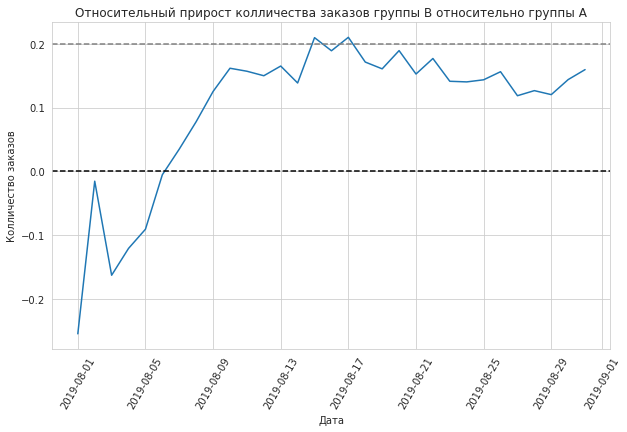

In [23]:
#объеденим по столбцу с датой и зададим суффиксы для каждый группы  
merged_сonversion = cumulative_df_a[['date','conversion']].merge(
    cumulative_df_b[['date','conversion']], 
    left_on='date',
    right_on='date', 
    how='left',
    suffixes=['_a', '_b']
)

# зададим размеры графика  
plt.figure(figsize=(10,6))   

plt.plot(merged_сonversion['date'],
         merged_сonversion['conversion_b']/
         merged_сonversion['conversion_a']-1,
        )
# добавляем ось X c нулевым приростом и отметку в 20% 
plt.axhline(y=0, color='black', linestyle='--')  
plt.axhline(y=0.2, color='grey', linestyle='--') 
# зададим описание графика 
plt.ylabel('Колличество заказов') 
plt.xlabel('Дата') 
plt.title('Относительный прирост колличества заказов группы B относительно группы A') 
plt.xticks(rotation = 60)
plt.show()

На графике видим, что в начале теста, колличество заказов показывало не стабильные результаты, сначало резко поднималось, а потом опускалось, но на 6й день теста, получили стабильный прирост, который привысил 20% и установился в пределах от 10 до 15 % к концу периода.

### Точечный график количества заказов по пользователям

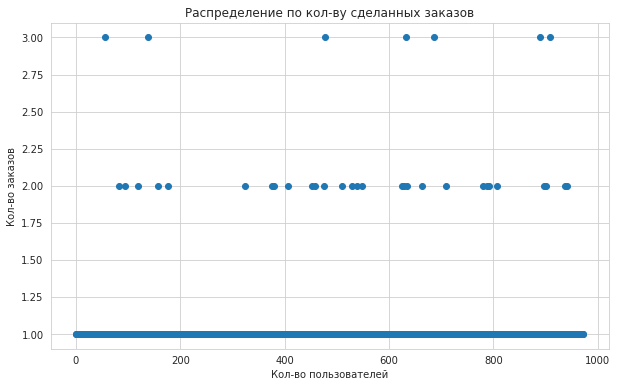

In [24]:
#создадим сводную таблицу с кол-вом закзазов для каждого пользователя 
orders_count = (
    orders
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
#переименуем столбуы 
orders_count.columns = ['user_id', 'orders']

# серия из чисел от 0 до количества наблюдений в orders_count 
x_values = pd.Series(range(0, len(orders_count)))
# зададим размеры графика  
plt.figure(figsize=(10,6)) 
#построим график 
plt.scatter(x_values, orders_count['orders'])  
# зададим описание графика 
plt.ylabel('Кол-во заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение по кол-ву сделанных заказов') 
plt.show() 

Больше всего пользователей с 1м или 2мя заказами, остальные довольно редкие, пользователей с 3-я заказами уже можно посчитать на взгляд по кол-ву точек на графике, но есть уникальные, которые сделали до11 заказов за период.

### 95-й и 99-й перцентили количества заказов на пользователя

In [25]:
# Определяем 95-й и 99-й процентили
print(np.percentile(orders_count['orders'], [95, 99])) 

[1. 2.]


Получаем следующий результат:
* не более 5 % совершили больше 1-ух заказов
* не более 1 % совершили больше 2-ух заказов

Устанавливаем границу по колличеству заказов на пользователя в 2 шт.

### Точечный график стоимостей заказов

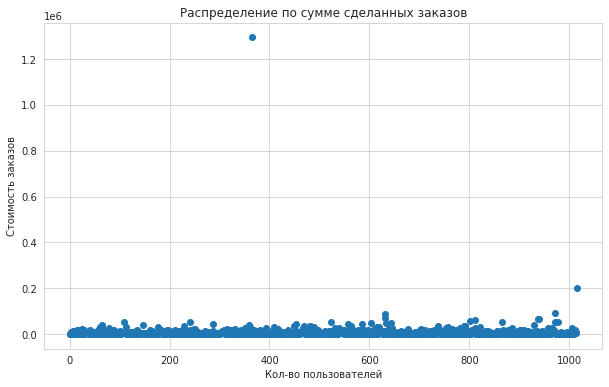

In [26]:
# серия из чисел от 0 до количества наблюдений в orders 
x_values = pd.Series(range(0, len(orders['revenue'])))
# зададим размеры графика  
plt.figure(figsize=(10,6)) 
#построим график 
scattter_plot = plt.scatter(x_values, orders['revenue'])  
# зададим описание графика 
plt.ylabel('Стоимость заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение по сумме сделанных заказов') 
plt.show() 

Можно уже заметить, что максимальное значения сильно превосходит остальные. Заказы на 200 тысяч и миллинон - очевидно будут сильно выбиваться. Зададим лимит в 100 000, что бы подробнее изучить распредление наиболее частых заказов:

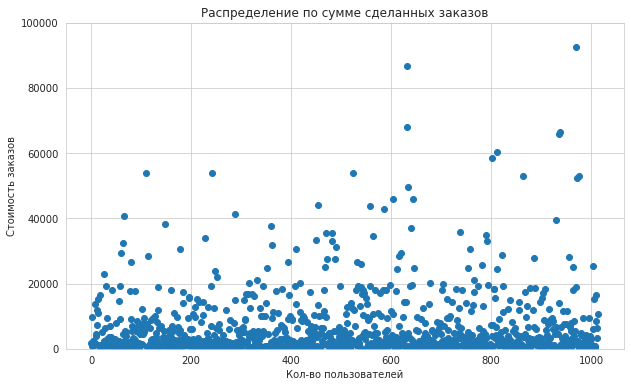

In [27]:
# серия из чисел от 0 до количества наблюдений в orders 
x_values = pd.Series(range(0, len(orders['revenue'])))
# зададим размеры графика  
plt.figure(figsize=(10,6))
#построим график 
plt.scatter(x_values, orders['revenue'])
#срежем очевидно анамальные заказы 
plt.ylim(0, 100000) 
# зададим описание графика 
plt.ylabel('Стоимость заказов') 
plt.xlabel('Кол-во пользователей') 
plt.title('Распределение по сумме сделанных заказов') 
plt.show()  

Видим, что основные значения лежат в пределах до приблизтельно 20000, по графику всё ещё сложно оценить границу анамально большого заказа, воспользуемся подсчётом процентелией

### 95-й и 99-й перцентили стоимости заказов

In [28]:
# Находим 95-й и 99-й процентили
print(np.percentile(orders['revenue'], [95, 99]))  

[26785. 53904.]


Получаем следующий результат:
* не более 5 % заказов стомостью более 26785 рублей 
* не более 1 % заказов стомостью более 53904 рублей  

Устанавливаем границу по сумме заказа в 26785 рублей.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Статистическую значимость различий будет считать с помощью теста Манна-Уитни

**Нулевая гипотеза:** Различий в колличестве заказов между группами нет

**Альтернативная гипотеза:** Различия в колличестве заказов между группами есть

**Коэффициент альфа:** 0.05

In [29]:
# таблицы с данными по заказам на каждого пользователя
orders_by_users_a = orders[orders['group']=='A'].groupby('visitorid')['transactionid'].nunique().reset_index()
orders_by_users_a.columns=['visitorsid','orders']

orders_by_users_b = orders[orders['group']=='B'].groupby('visitorid')['transactionid'].nunique().reset_index()
orders_by_users_b.columns=['visitorsid','orders'] 
# ------------------
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(0, 
                  index=np.arange
                  (visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])
                  ),
                  name='orders'
                 )
    ],
    axis=0)
sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series
        (0,
         index=np.arange(
             visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])
         ),
         name='orders'
        )
    ],
    axis=0)
# ---------------------------
result_1 = stats.mannwhitneyu(sample_a, sample_b)[1] 
#задаим значение aplha
alpha = 0.05
#введем значение p-value
print(f'Значение p-value : {result_1}')
# условный оператор с выводом строки с ответом
if result_1 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
print('Среднее колличество заказов группы А: {:.1%}'.format(sample_a.mean()))
print('Среднее колличество заказов B: {:.1%}'.format(sample_b.mean()))  
print('Отношение колличеств заказов в группе В к колличеству заказов в группе А: {0:.3f}'.format(sample_b.mean()/sample_a.mean()-1))  

Значение p-value : 0.011018084110014696
Отвергаем нулевую гипотезу
Среднее колличество заказов группы А: 2.5%
Среднее колличество заказов B: 2.9%
Отношение колличеств заказов в группе В к колличеству заказов в группе А: 0.160


P-value меньше заданного значения alpha - отвергаем нулевую гипотезу, следовательно верно утвеждение о том, что различия в колличестве заказов есть. 

Отношения колличества заказов группы А к В 0.16, что можно интропритировать как относительный прирост в ~16%, что является не плохим результатом, на следующих этапах посмотрим какое значения будут иметь данные без аномалий 

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

**Нулевая гипотеза:** Различий в средних чеках между группами нет

**Альтернативная гипотеза:** Различия в средних чеках между группами есть

**Коэффициент альфа:** 0.05


In [34]:
result_2 = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]  
#введем значение p-value
print(f'Значение p-value : {result_2}')
# условный оператор с выводом строки с ответом
if result_2 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
#выведем основные показатели
print('Средний чек группы А: {:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean())) 
print('Отношение значения среднего чека в группе B к значению среднего чека в группе A : {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean() / orders[orders['group']=='A']['revenue'].mean()))

Значение p-value : 0.8294908998149533
Не получилось отвергнуть нулевую гипотезу
Средний чек группы А: 7189.44
Средний чек группы B: 9249.95
Отношение значения среднего чека в группе B к значению среднего чека в группе A : 1.29


P-value значительно больше alpha, значит принимаем нулевую гипотезу - статичстичкой значимости различий в средних чеках нет, несмотря на разницу общего среднего значения по группам, которая составила в абсолютных значений 29%

### Статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [31]:
# собираем пользователей с большим кол-вом заказов 
many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 2]['visitorsid'],
        orders_by_users_b[orders_by_users_b['orders'] > 2]['visitorsid'],
    ],
    axis=0,
)

# собираем пользователей с слишком дорогими заказами
expensive_orders = orders[orders['revenue'] > 26785]['visitorid']

# объединяем всё в один датафрейм 
abnormal_users = (
    pd.concat([many_orders, expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print(' ')
print('Кол-во анамальных пользователей: ', abnormal_users.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
 
Кол-во анамальных пользователей:  58


Такое кол-во может повлиять на итоговые выводы, используем полученные данные для того, чтобы убрать аномалии:

Статистическую значимость различий будет считать с помощью теста Манна-Уитни

**Нулевая гипотеза:** Различий в колличестве заказов между "отфильтрованными" группами нет

**Альтернативная гипотеза:** Различия в колличестве заказов между "отфильтрованными" группами есть

**Коэффициент альфа:** 0.05

In [32]:
#отфильтруем данные в группе А 
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitorsid'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#отфильтруем данные в группе В
sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitorsid'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)  

result_3 = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1] 
#ведем значение pvalue
print(f'Значение p-value : {result_3}') 
# условный оператор с выводом строки с ответом
if result_3 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('Среднее колличество заказов (очищенная) группы А: {:.1%}'.format(sample_a_filtered.mean()))
print('Среднее колличество заказов (очищенная) группы B: {:.1%}'.format(sample_b_filtered.mean())) 
print('Отношение колличества заказов в группе В к колличеству заказов в группе А, по очищенным данным: {0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

Значение p-value : 0.01235203801772639
Отвергаем нулевую гипотезу
Среднее колличество заказов (очищенная) группы А: 2.3%
Среднее колличество заказов (очищенная) группы B: 2.7%
Отношение колличества заказов в группе В к колличеству заказов в группе А, по очищенным данным: 0.182


Для "очищенных" данных также справедливо утверждение о том, что колличества заказов разные и нулевая гипотеза верна. Само значение колличества заказов изменилось в меньшую сторону для обоих групп, лидируют по-прежнему пользователи из B, а средний прирост оказался выше более 2-х%

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Для "сырых" данных была принята нулевая гипотеза, проверим можем ли мы говорить о статистическом равенстве для "очищенных" данных

**Нулевая гипотеза:** Различий в средних чеках между "отфильтрованными" группами нет

**Альтернативная гипотеза:** Различия в средних чеках между "отфильрованными" группами есть

**Коэффициент альфа:** 0.05

In [33]:
result4 = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'])[1] 

#посчитаем среднием значения 
mean_revenue_b = orders[np.logical_and(orders['group']=='B',
                                       np.logical_not(orders['visitorid'].
                                                      isin(abnormal_users)))]['revenue'].mean()
mean_revenue_a = orders[np.logical_and(orders['group']=='A',
                                       np.logical_not(orders['visitorid'].
                                                      isin(abnormal_users)))]['revenue'].mean() 

print(f'Значение p-value : {result4}')  
# условный оператор с выводом строки с ответом
if result4 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
#выведем всю необходимую информацию
print('Средний чек группы А (очищенная): {:.1f}'.format(mean_revenue_b))
print('Средний чек группы B (очищенная): {:.1f}'.format(mean_revenue_a))
print('Отношение значения среднего чека в группе B к значению среднего чека в группе A, по очищенным данным: {0:.2f}'.format(mean_revenue_b / mean_revenue_a)) 

Значение p-value : 0.6458964038091206
Не получилось отвергнуть нулевую гипотезу
Средний чек группы А (очищенная): 4855.2
Средний чек группы B (очищенная): 5102.5
Отношение значения среднего чека в группе B к значению среднего чека в группе A, по очищенным данным: 0.95


Для "очищенных" данных статистическая занчимость средних чеков группы B и A, также равны, но стоит заметить, что абсолютные значения практически выровнились, отношение близко к единице

## Выводы

По результатам тестирования было выявлено:

1. И по "сырым" и по "очищенным" данным различия в колличестве заказов по группам A и B есть. Относительный выигрыш группы "B" над "A" равен 18.2% по "очищенным" и 16% по "сырым" данным.

2. Оказалось, что и по "сырым" и по "очищенным" данным различия в средних чеках групп A и B отстутствуют, несмотря на то, что средний чек группы B оказался незначительно (на 5%) ниже среднего чека группы A по "очищенным" данным, в то время как по "сырым" данным, он был больше аж на 29%

Таким образом, по результатам A/B-тестирования мы пришли к следующим выводам:

* Существует статистически значимая разница между колличествами заказов групп A и B как при подсчёте по "сырым", так и по "очищенным" данным. 
* Статистически значимой разницы между средними чеками групп нет. Однако при "очищенных данных" средний чек группы В проигрывает группе А относительно на 5%.
* График относительного изменения накопительного колличества заказов группы B к группе A показывает, что колличество заказов в группе В стабильно лучше группы А. Возможно это значение ещё колеблется вокруг среднего, но уже точно А не будет лучше.
* По графику относительного изменения среднего чека группы В к группе А нельзя сказать ничего конкретного. График искажён аномальными значениями.
* Изменения, которые показывались группе В улучшили колличество заказов пользователей, но на средний чек эти изменения повлияли в меньшей степени (если не брать в счёт аномально дорогие заказы).

Выводы по проверке гипотез:

1. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным:
    
    **Нулевая гипотеза:** Различий в колличестве заказов между группами нет - ***Отвергаем***

2. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным:
    
    **Нулевая гипотеза:** Различий в средних чеках между группами нет - ***Не получилось отвергнуть нулевую гипотезу***
    
3.  Статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным:

    **Нулевая гипотеза:** Различий в колличестве заказов между "отфильтрованными" группами нет - ***Отвергаем нулевую гипотезу***
    
4.  Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным:

    **Нулевая гипотеза:** Различий в средних чеках между "отфильтрованными" группами нет - ***Не получилось отвергнуть нулевую гипотезу***


Думаю, тест можно остановить и признать его успешным. Заметно улучшение в колличестве заказов в группе В относительно группы А.